# K-mean to BTCUSD1

In [62]:
import numpy as np
import pandas as pd 
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler

In [63]:
import pandas as pd
url = 'https://raw.githubusercontent.com/Maneenoot/Datasets/master/Data%20Set/BTCUSD1.csv'
df = pd.read_csv(url, error_bad_lines=False, index_col = 0, parse_dates= True) #แสดงคอลัมที่ 0 ให้เป็นวันที่
df 

,Time,Open,High,Low,Close,Volume
Date,,,,,,
2011-03-24,0:00,0.8,0.9,0.8,0.9,14009
2011-03-25,0:00,0.9,0.9,0.9,0.9,4819
2011-03-26,0:00,0.9,0.9,0.8,0.9,11756
2011-03-27,0:00,0.8,0.9,0.8,0.8,5337
2011-03-28,0:00,0.8,0.9,0.8,0.8,12565
...,...,...,...,...,...,...
2020-03-20,0:00,6239.9,6746.4,6037.5,6567.4,41823
2020-05-25,0:00,8925.5,8962.0,8885.1,8902.0,3200
2020-05-26,0:00,8910.5,9002.8,8674.3,8842.8,52575


In [64]:
type(df) #ให้เก็บในรูป DataFrame เสมอ

pandas.core.frame.DataFrame

In [65]:
stock = df.copy() 
stock.head()

,Time,Open,High,Low,Close,Volume
Date,,,,,,
2011-03-24,0:00,0.8,0.9,0.8,0.9,14009
2011-03-25,0:00,0.9,0.9,0.9,0.9,4819
2011-03-26,0:00,0.9,0.9,0.8,0.9,11756
2011-03-27,0:00,0.8,0.9,0.8,0.8,5337
2011-03-28,0:00,0.8,0.9,0.8,0.8,12565


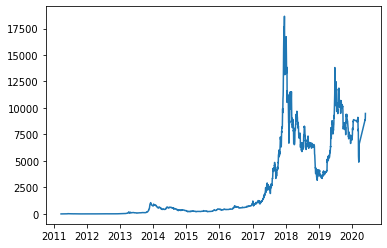

In [66]:
plt.plot(stock['Close'])

## Calculate Log return

In [67]:
stock['Log Rets'] = np.log(stock['Close']/stock['Close'].shift(1))
stock.head()

,Time,Open,High,Low,Close,Volume,Log Rets
Date,,,,,,,
2011-03-24,0:00,0.8,0.9,0.8,0.9,14009,NaN
2011-03-25,0:00,0.9,0.9,0.9,0.9,4819,0.000000
2011-03-26,0:00,0.9,0.9,0.8,0.9,11756,0.000000
2011-03-27,0:00,0.8,0.9,0.8,0.8,5337,-0.117783
2011-03-28,0:00,0.8,0.9,0.8,0.8,12565,0.000000


In [68]:
stock.dropna(inplace=True)
stock.head()

,Time,Open,High,Low,Close,Volume,Log Rets
Date,,,,,,,
2011-03-25,0:00,0.9,0.9,0.9,0.9,4819,0.000000
2011-03-26,0:00,0.9,0.9,0.8,0.9,11756,0.000000
2011-03-27,0:00,0.8,0.9,0.8,0.8,5337,-0.117783
2011-03-28,0:00,0.8,0.9,0.8,0.8,12565,0.000000
2011-03-29,0:00,0.8,0.8,0.8,0.8,4215,0.000000


## Features to be used for clustering
1. Mean of log_Rets
2. STDEV of log_Rets

In [69]:
stock['Rets_mean'] = stock['Log Rets'].rolling(5).mean() #ใช้กี่วันก็ได้แต่ยกตัวอย่าง5วัน
stock['Rets_std'] = stock['Log Rets'].rolling(5).std()
stock.head()

,Time,Open,High,Low,Close,Volume,Log Rets,Rets_mean,Rets_std
Date,,,,,,,,,
2011-03-25,0:00,0.9,0.9,0.9,0.9,4819,0.000000,NaN,NaN
2011-03-26,0:00,0.9,0.9,0.8,0.9,11756,0.000000,NaN,NaN
2011-03-27,0:00,0.8,0.9,0.8,0.8,5337,-0.117783,NaN,NaN
2011-03-28,0:00,0.8,0.9,0.8,0.8,12565,0.000000,NaN,NaN
2011-03-29,0:00,0.8,0.8,0.8,0.8,4215,0.000000,-0.023557,0.052674


In [70]:
stock.dropna(inplace=True)
stock.head()

,Time,Open,High,Low,Close,Volume,Log Rets,Rets_mean,Rets_std
Date,,,,,,,,,
2011-03-29,0:00,0.8,0.8,0.8,0.8,4215,0.0,-0.023557,0.052674
2011-03-30,0:00,0.8,0.8,0.8,0.8,3218,0.0,-0.023557,0.052674
2011-03-31,0:00,0.8,0.8,0.8,0.8,6875,0.0,-0.023557,0.052674
2011-04-01,0:00,0.8,0.8,0.8,0.8,3186,0.0,0.000000,0.000000
2011-04-02,0:00,0.8,0.8,0.8,0.8,2493,0.0,0.000000,0.000000


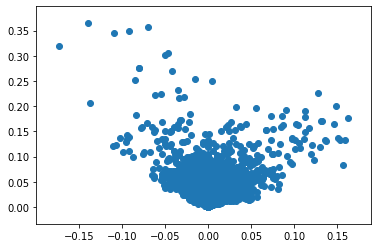

In [71]:
plt.scatter(stock['Rets_mean'],stock['Rets_std'])

## การทำ Normalisation ข้อมูล Features

In [72]:
X1 = stock['Rets_mean'].values
X2 = stock['Rets_std'].values

X=np.array(list(zip(X1,X2)))

In [73]:
X

array([[-0.02355661,  0.05267417],
       [-0.02355661,  0.05267417],
       [-0.02355661,  0.05267417],
       ...,
       [ 0.09684163,  0.13620983],
       [ 0.10585531,  0.12745513],
       [ 0.08369956,  0.1254473 ]])

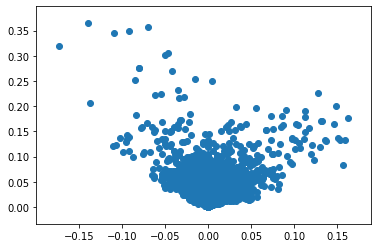

In [74]:
plt.scatter(X[:,0], X[:,1])

## Normalosation

In [75]:
def normFea(x):
    sc = StandardScaler()
    x = sc.fit_transform(x)
    
    return x

In [76]:
X_norm = normFea(X)

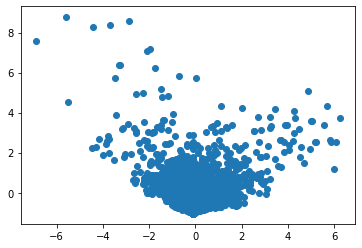

In [77]:
plt.scatter(X_norm[:,0], X_norm[:,1])

## การสร้างฟังก์ชัน Kmean และ ฟังก์ชันอื่นๆ ที่จำเป็น

In [78]:
#Start K-mean clustering
def dist(a, b, ax = 1):
    return np.linalg.norm(a - b, axis = ax)

In [91]:
def plotClust(data,C, K, cluster_label):
    
    colors = ['red', 'green', 'blue', 'pink', 'yellow', 'purple', 'navy', 'coral']
    plt.figure(figsize=(8,6))
    
    for i in range(K):
        points =[]
        points =np.array([data[j] for j in range(len(data)) if cluster_label[j] ==i])
        plt.scatter(points[:,0],points[:,1], s=7 , c= colors[i])
        plt.annotate(i, (C[i,0], C[i,1]), size=20)
        
    plt.scatter(C[:,0], C[:,1], marker = '*', color='black', s =200)
    
    plt.xlabel("V1")
    plt.xlabel("V2")
    plt.title("Cluster")

In [92]:
def kmeanClust(data, K):
    #step 1: random centrod
    C_x=np.random.randint(np.min(data[:,0]), np.max(data[:,0]),size=K)
    C_y=np.random.randint(np.min(data[:,1]), np.max(data[:,1]),size=K)
    
    #set centroid to a variable C
    C = np.zeros((K,2))
    C_old = np.zeros(C.shape)
    
    C[:,0] = C_x
    C[:,1] = C_y
    
    #step2: label data
    cluster_label = np.zeros(len(data))
    
    for i in range(len(data)):
        distance = dist(data[i,:], C)
        cluster = np.argmin(distance)
        cluster_label[i] = cluster
        
    # step3 calculate new centroids
    C_old = C.copy()
    
    for i in range(K):
        points =[]
        points = np.array([data[j] for j in range(len(data)) if cluster_label[j]== i])
        C[i] = np.mean(points, axis=0)
        
        
    error = dist(C, C_old, None)
    plotClust(data,C,K, cluster_label)
    
    while error !=0:
        cluster_label = np.zeros(len(data))
        
        for i in range(len(data)):
            distance = dist(data[i,:], C)
            cluster = np.argmin(distance)
            cluster_label[i] = cluster
        
        C_old = C.copy()
    
        for i in range(K):
        
            points =[]
        
            points = np.array([data[j] for j in range(len(data)) if cluster_label[j]== i])
            C[i] = np.mean(points, axis=0)
        
        plotClust(data,C,K, cluster_label)
        error = dist(C, C_old, None)
        print(error)
        
    return cluster_label    

2.2304257309320374
1.304384790695801
0.5032731919436139
0.3650605625647302
0.1996068605934904
0.17526336818381902
0.18580569206314454
0.14241012262666475
0.1586864831496616
0.1564257237299777
0.21016396984900937
0.118829388523973
0.13779511566835048
0.07345114456375658
0.0747025318761028
0.047675775661232274
0.06337092129143315
0.04260682714754613
0.058195436677026376
0.06059703826366047
0.08795807386790518
0.06307750892020177


C:\Users\fortu\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  after removing the cwd from sys.path.


0.05489523569972192
0.04424279602418615
0.02526109281707314
0.007571327096737622
0.010464438237119704
0.007523051923472035
0.007115200391957878
0.019959242834522717
0.010300841980770447
0.0038343940140413263
0.0


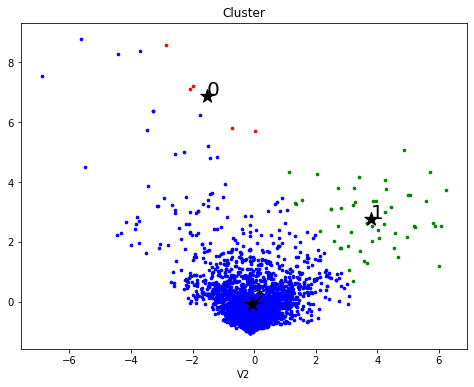

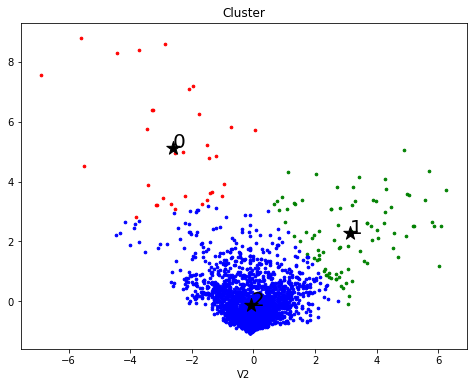

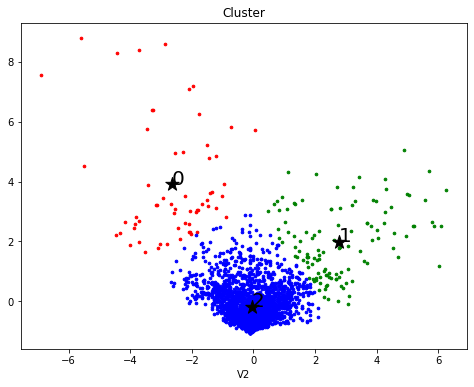

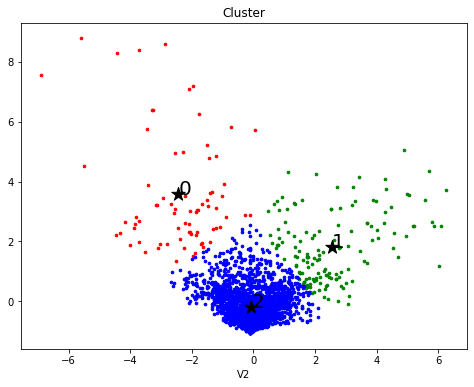

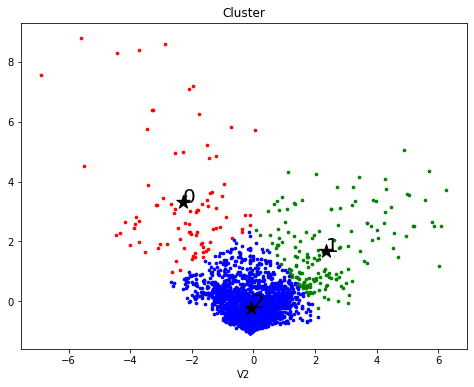

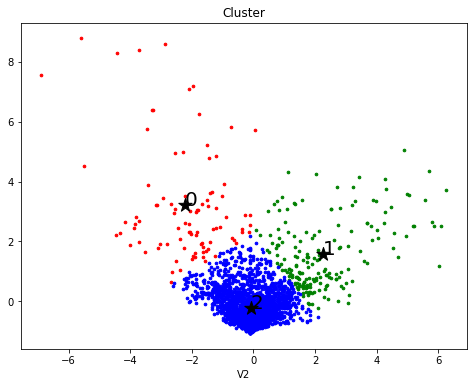

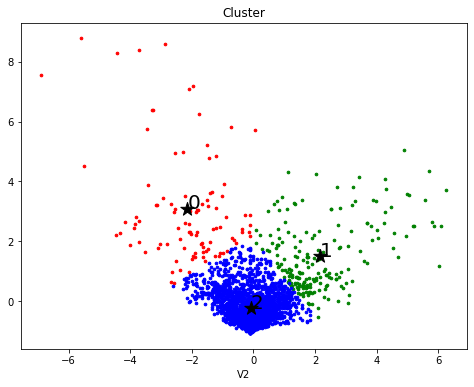

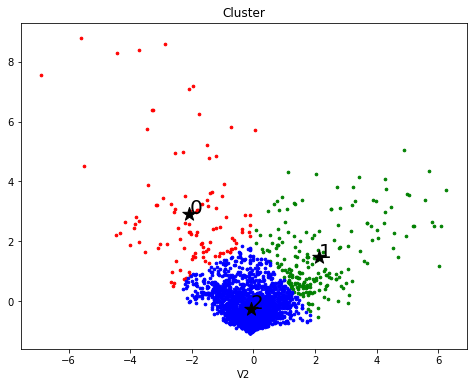

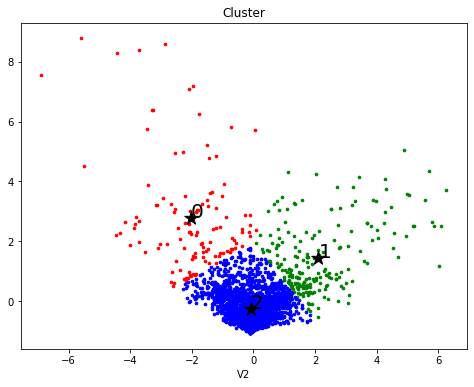

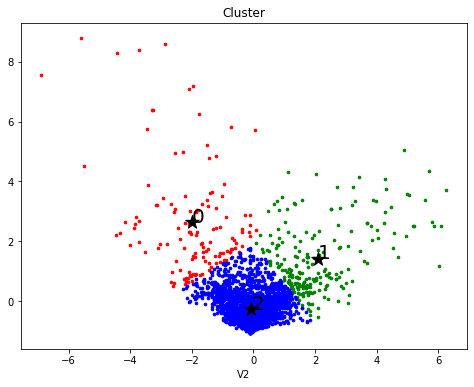

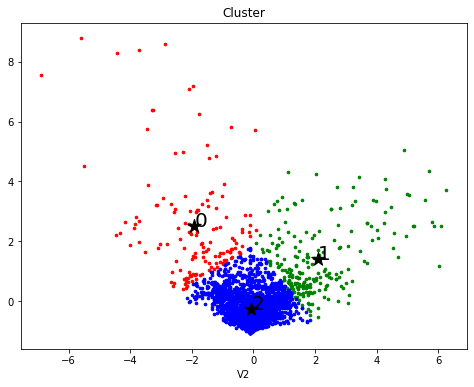

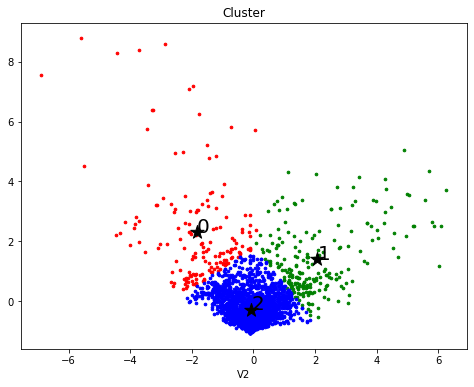

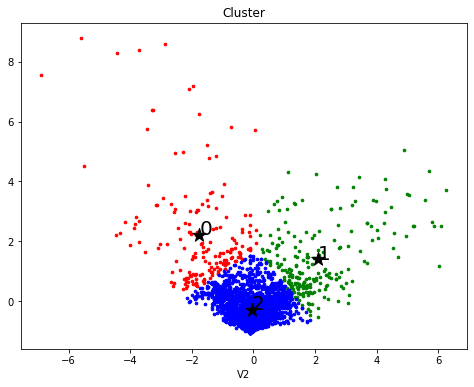

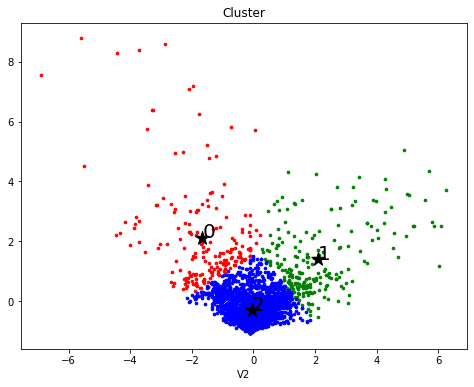

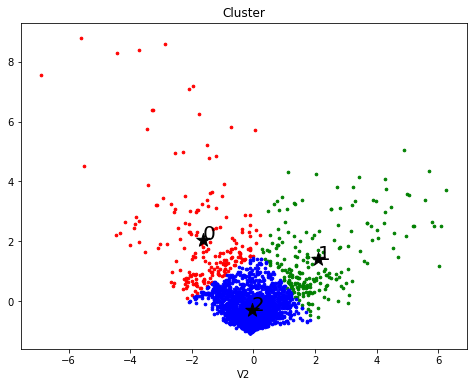

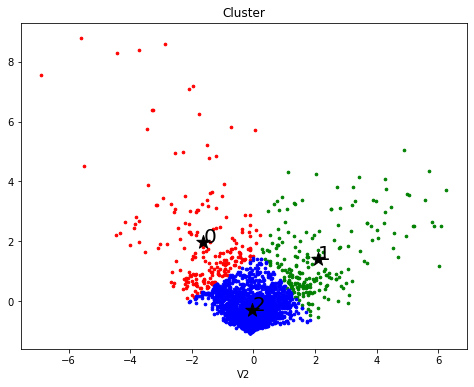

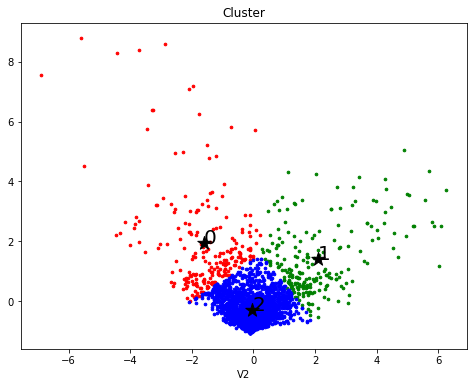

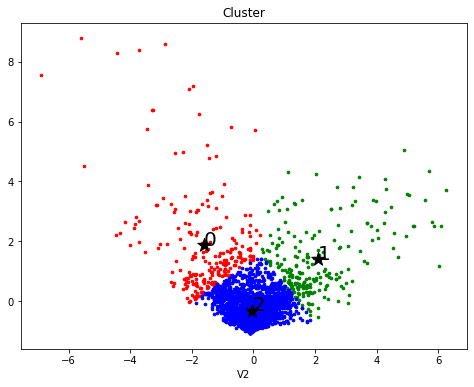

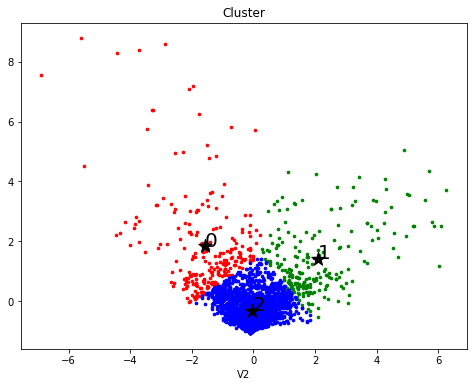

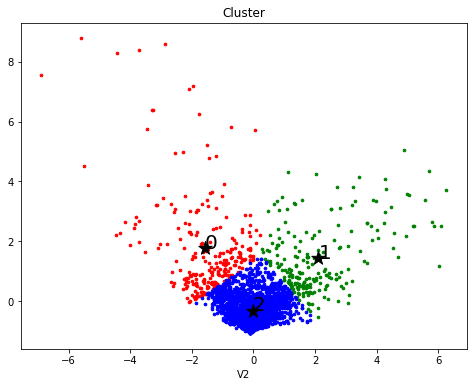

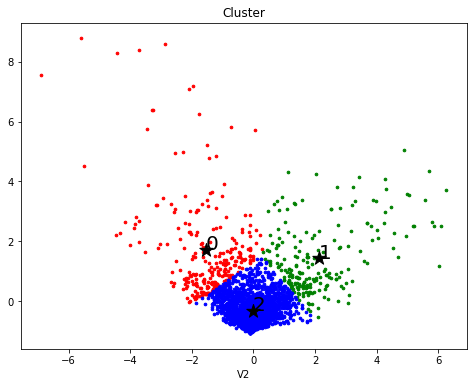

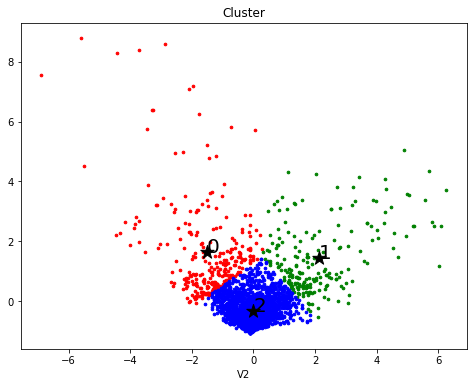

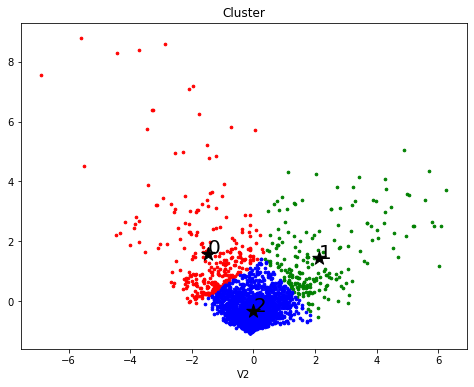

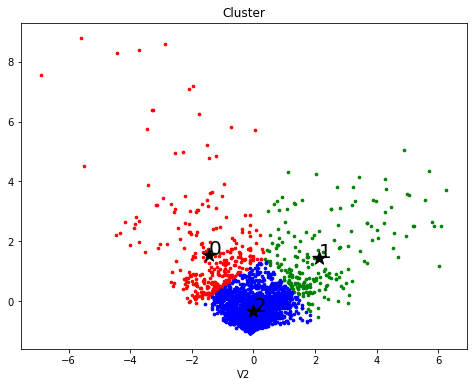

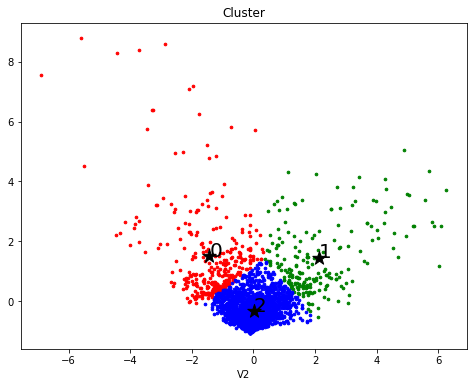

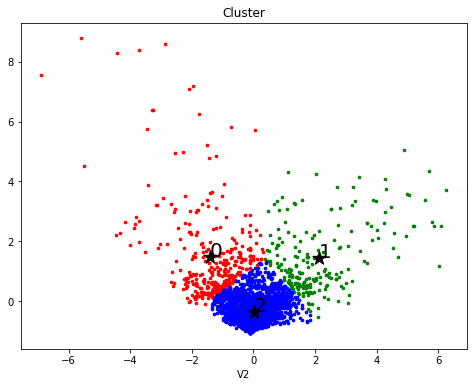

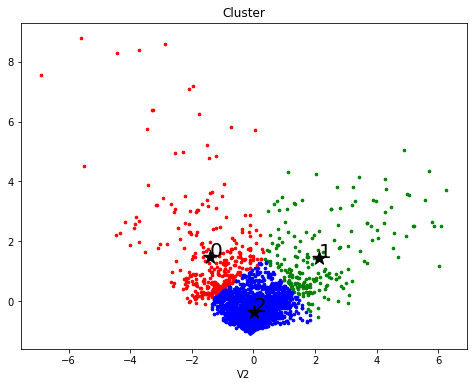

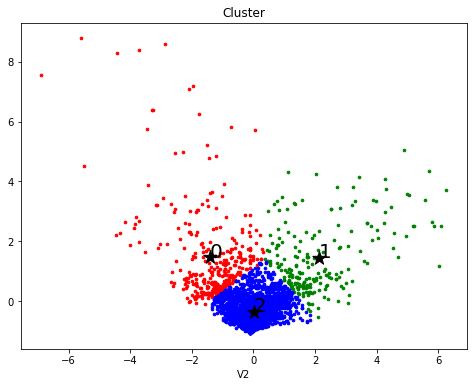

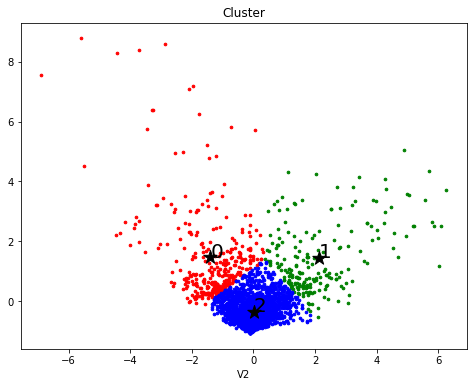

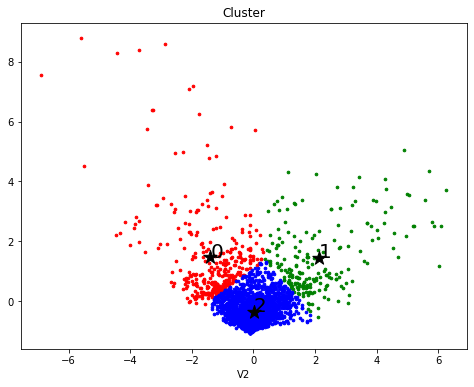

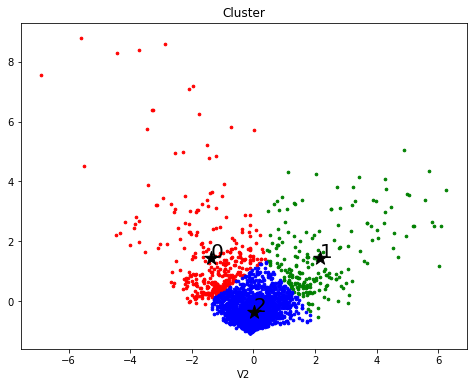

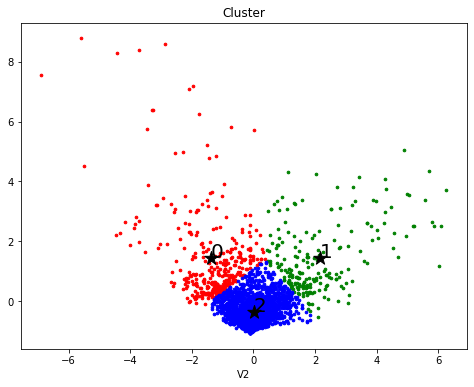

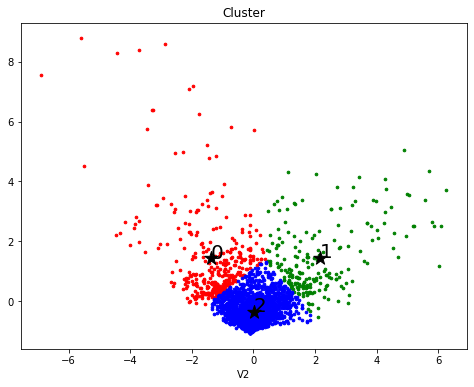

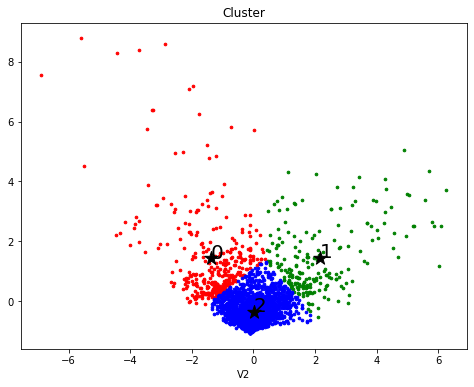

In [93]:
K = 3
label_kmean = kmeanClust(X_norm, K)

In [94]:
label_kmean

array([0., 0., 0., ..., 1., 1., 1.])

## Use label from Kmean

In [97]:
stock['Class'] = label_kmean
stock.head(10)

,Time,Open,High,Low,Close,Volume,Log Rets,Rets_mean,Rets_std,Class
Date,,,,,,,,,,
2011-03-29,0:00,0.8,0.8,0.8,0.8,4215,0.000000,-2.355661e-02,0.052674,0.0
2011-03-30,0:00,0.8,0.8,0.8,0.8,3218,0.000000,-2.355661e-02,0.052674,0.0
2011-03-31,0:00,0.8,0.8,0.8,0.8,6875,0.000000,-2.355661e-02,0.052674,0.0
2011-04-01,0:00,0.8,0.8,0.8,0.8,3186,0.000000,0.000000e+00,0.000000,2.0
2011-04-02,0:00,0.8,0.8,0.8,0.8,2493,0.000000,0.000000e+00,0.000000,2.0
2011-04-03,0:00,0.8,0.8,0.8,0.8,3931,0.000000,0.000000e+00,0.000000,2.0
2011-04-04,0:00,0.8,0.8,0.6,0.7,31155,-0.133531,-2.670628e-02,0.059717,0.0
2011-04-05,0:00,0.7,0.8,0.6,0.7,9730,0.000000,-2.670628e-02,0.059717,0.0
2011-04-06,0:00,0.7,0.8,0.7,0.7,8703,0.000000,-2.670628e-02,0.059717,0.0


In [99]:
idx_c0 = np.where(stock['Class'] == 0)
idx_c1 = np.where(stock['Class'] == 1)
idx_c2 = np.where(stock['Class'] == 2)

In [100]:
idx_c0

(array([   0,    1,    2,    6,    7,    8,    9,   10,   11,   12,   37,
          50,   51,   52,   53,   54,   55,   74,   75,   76,   77,   78,
          80,   81,   82,   83,   91,   92,   93,   94,   95,  121,  122,
         123,  124,  125,  126,  127,  128,  143,  144,  145,  146,  147,
         148,  155,  156,  157,  158,  159,  160,  161,  162,  164,  165,
         166,  167,  168,  174,  187,  188,  189,  190,  196,  197,  198,
         199,  200,  206,  207,  224,  225,  226,  227,  228,  229,  230,
         231,  271,  274,  278,  279,  280,  281,  282,  287,  288,  289,
         290,  306,  307,  308,  309,  310,  340,  341,  342,  343,  344,
         491,  492,  493,  494,  495,  496,  497,  714,  715,  716,  717,
         718,  728,  729,  730,  731,  732,  733,  734,  735,  736,  769,
         770,  771,  791,  792,  793,  794,  795,  796,  797,  798,  799,
         834,  836,  837,  838,  908,  909,  931,  932,  933,  934,  935,
         936,  938,  939,  953,  954, 

In [101]:
# if trade idx_c0
profit_c0 = np.array(stock['Log Rets']).reshape(-1,1)
profit_c0

array([[ 0.        ],
       [ 0.        ],
       [ 0.        ],
       ...,
       [-0.0066724 ],
       [ 0.02144701],
       [ 0.04855559]])

In [102]:
profit_c0[idx_c1,0] = 0
profit_c0[idx_c2,0] = 0
profit_c0

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])

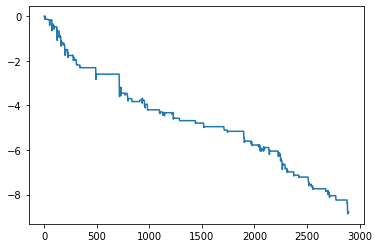

In [104]:
plt.plot(profit_c0.cumsum())

In [105]:
# if trade idx_c1
profit_c1 = np.array(stock['Log Rets']).reshape(-1,1)
profit_c1

array([[ 0.        ],
       [ 0.        ],
       [ 0.        ],
       ...,
       [-0.0066724 ],
       [ 0.02144701],
       [ 0.04855559]])

In [106]:
profit_c1[idx_c0,0] = 0
profit_c1[idx_c2,0] = 0
profit_c1

array([[ 0.        ],
       [ 0.        ],
       [ 0.        ],
       ...,
       [-0.0066724 ],
       [ 0.02144701],
       [ 0.04855559]])

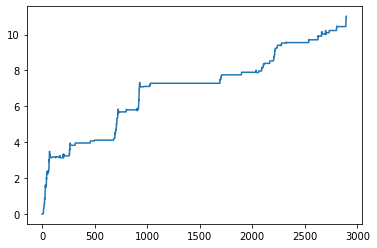

In [107]:
plt.plot(profit_c1.cumsum())

In [108]:
# if trade idx_c2
profit_c2 = np.array(stock['Log Rets']).reshape(-1,1)
profit_c2

array([[ 0.        ],
       [ 0.        ],
       [ 0.        ],
       ...,
       [-0.0066724 ],
       [ 0.02144701],
       [ 0.04855559]])

In [109]:
profit_c2[idx_c0,0] = 0
profit_c2[idx_c1,0] = 0
profit_c2

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])

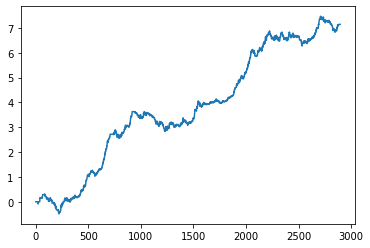

In [110]:
plt.plot(profit_c2.cumsum())

### จากผลการทดลองนี้ เราจะใช้ กลุ่ม c1,c2ในการเทรด(สรุปจากข้อมูลที่มีอยู่เท่านั้นไม่ได้ใช้จริงเพราะยังมีปัจจัยอื่นที่กี่ยวข้อง)